In [66]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from allison.linear_models.linear_regression import LinearRegression
from allison.utils.functions.loss import mean_square_error
from allison.utils.metrics import r2_score
from allison.utils.functions.data import train_test_split

In [67]:
n = 1000
x=np.linspace(2,20,n)
y=2*x + 1 + 2*np.sin(x) + np.random.randn(n)

data = pd.DataFrame({'x':x, 'y':y})
data.head()

,x,y
0,2.000000,7.815861
1,2.018018,6.291252
2,2.036036,5.145857
3,2.054054,5.976817
4,2.072072,6.611817


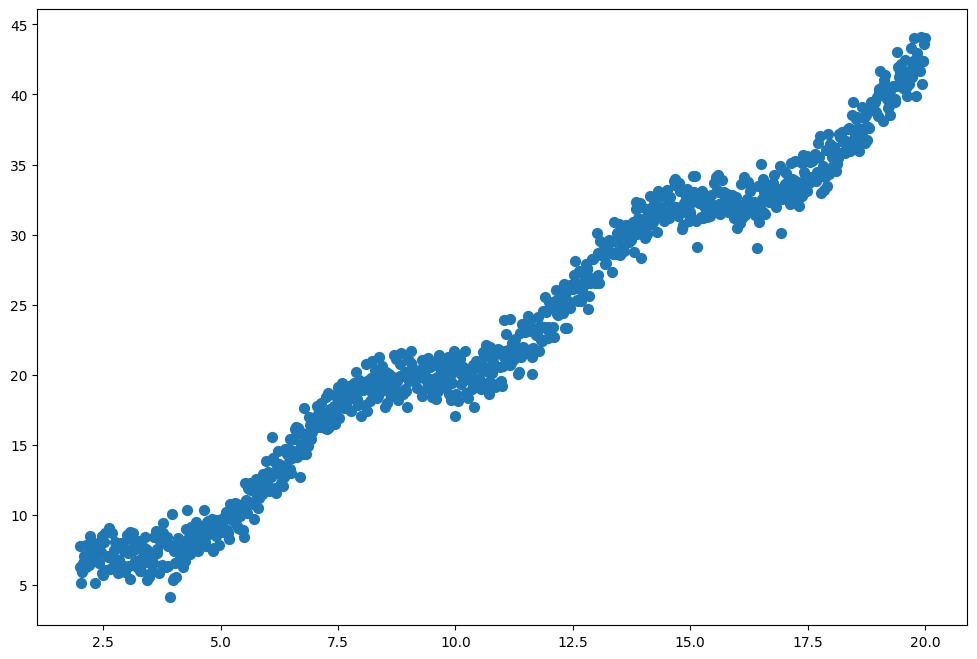

In [68]:
plt.figure(figsize=(12,8))
plt.scatter(data['x'],data['y'],s=50)

In [69]:
X = data['x']
y = data['y']

X_train, X_test, y_train, y_test = train_test_split(X,y , test_size=0.2, random_state=42)

In [70]:
model=LinearRegression()

model.optimizers(mean_square_error,
                 r2_score,
                 0.001)

model.train(X_train, y_train,n_iters=20, history_train=True)

Iter:	2	==================================================>	 r2_score: -115.336% 

Iter:	4	==================================================>	 r2_score: 28.357% 

Iter:	6	==================================================>	 r2_score: 74.966% 

Iter:	8	==================================================>	 r2_score: 90.110% 

Iter:	10	==================================================>	 r2_score: 95.046% 

Iter:	12	==================================================>	 r2_score: 96.664% 

Iter:	14	==================================================>	 r2_score: 97.198% 

Iter:	16	==================================================>	 r2_score: 97.378% 

Iter:	18	==================================================>	 r2_score: 97.439% 

Iter:	20	==================================================>	 r2_score: 97.462% 



In [71]:
model.evaluate(X_test,y_test)

Metric: r2_score 



97.32263629326594

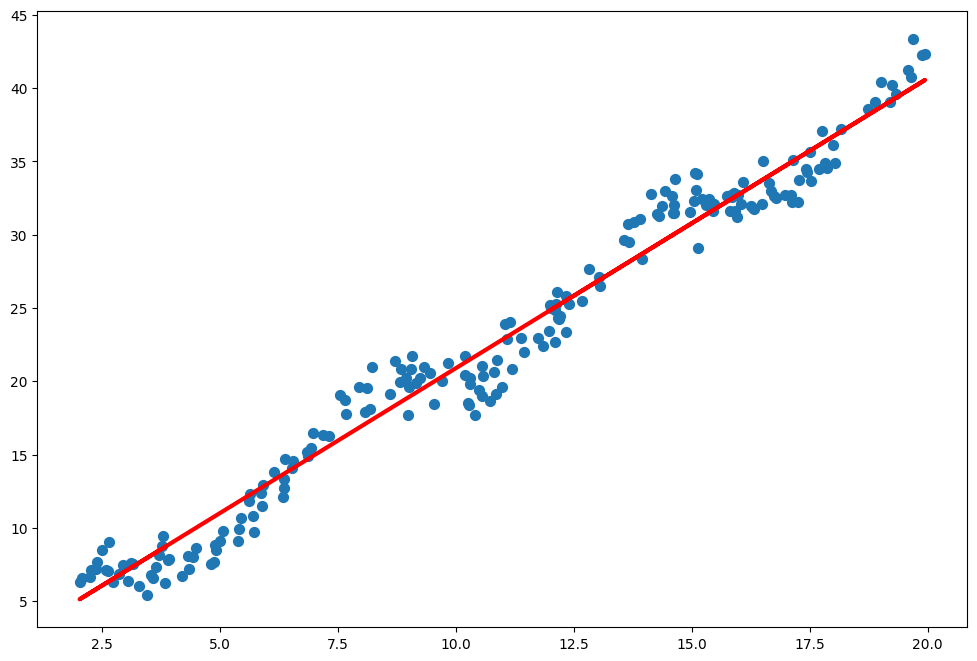

In [72]:
plt.figure(figsize=(12,8))
plt.scatter(X_test,y_test,s=50)
plt.plot(X_test,model.predict(X_test), lw=3, c='red')

In [73]:
history = model.history_train
history

{'iter': [2, 4, 6, 8, 10, 12, 14, 16, 18, 20],
 'loss': [240.93046830299835,
  80.15846949916296,
  28.009918090014718,
  11.065214857460978,
  5.542536399413928,
  3.733040413451231,
  3.1347823145879965,
  2.933962663375786,
  2.8648696807181193,
  2.840174875128051],
 'precision': [-115.33610163853663,
  28.356872184577576,
  74.96561306171905,
  90.11025775203372,
  95.04625467320095,
  96.66352547457487,
  97.19822981350836,
  97.37771612393243,
  97.43946926640909,
  97.46154070969287],
 'params': [{'bias': array([0.98996023]), 'weights': array([0.32235384])},
  {'bias': array([1.05479008]), 'weights': array([1.03808124])},
  {'bias': array([1.09166966]), 'weights': array([1.44523505])},
  {'bias': array([1.11264923]), 'weights': array([1.67685147])},
  {'bias': array([1.12458383]), 'weights': array([1.80861045])},
  {'bias': array([1.13137302]), 'weights': array([1.8835638])},
  {'bias': array([1.13523518]), 'weights': array([1.9262023])},
  {'bias': array([1.13743223]), 'weight

In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

# Create the figure and axis
fig, ax = plt.subplots(figsize=(10, 6))


# Update function for the animation
def update(i):
    ax.clear()  # Clear the axis

    model.bias = history['params'][i]['bias']
    model.weights = history['params'][i]['weights']

    a = model.weights[0]
    b = model.bias[0]

    ax.scatter(X_test, y_test, s=50)
    if i > 0:
        ax.plot(X_test, model.predict(X_test), lw=3, c='red',label=f'Predicted y = {a:.2f}x + {b:.2f}, loss = {history["loss"][i-1]:.2f}, MSE = {history["precision"][i-1]:.2f}')
    else:
        ax.plot(X_test, model.predict(X_test), lw=3, c='red', label=f'Predicted y = {a:.2f}x + {b:.2f}')
    ax.legend()


plt.close()

# Create the animation
ani = FuncAnimation(fig, update, frames=len(history['params']), repeat=False,interval=1000)
# Display the animation
HTML(ani.to_jshtml())